# Visualize Secondary Partitions (MegaMat, BNA)

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import colorcet as cc
import seaborn as sns
import matplotlib.pyplot as plt
import bct
from nilearn import surface, plotting, image, regions

/home/despoB/dlurie/anaconda3/envs/playpen/lib/python3.7/site-packages/nilearn-0.7.2.dev0-py3.7.egg/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
def gen_surfaces(measure, idx_lh, idx_rh):
    measure_lh = measure[:210][::2] # Select even numbered ROIs
    measure_rh = measure[:210][1::2] # Select odd numbered ROIs

    measure_lh = np.insert(measure_lh, 0, [0,0], axis=0)
    measure_rh = np.insert(measure_rh, 0, [0,0], axis=0)

    measure_map_lh = measure_lh[idx_lh]
    measure_map_rh = measure_rh[idx_rh]
    
    return measure_map_lh, measure_map_rh

In [5]:
def plot_surfaces(lh_surf, map_lh, lh_bg, rh_surf, map_rh, rh_bg, plot_cmap, plot_vmin, plot_vmax):
    fig, ax = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(20,20))
    a = plotting.plot_surf_roi(lh_infl, map_lh, hemi='left', cmap=plot_cmap, view='lateral',
                             bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[0][0])
    b = plotting.plot_surf_roi(rh_infl, map_rh, hemi='right', cmap=plot_cmap, view='lateral',
                             bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[0][1])
    c = plotting.plot_surf_roi(lh_infl, map_lh, hemi='left', cmap=plot_cmap, view='medial',
                             bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[1][0])
    d = plotting.plot_surf_roi(rh_infl, map_rh, hemi='right', cmap=plot_cmap, view='medial',
                             bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[1][1])
    plt.tight_layout()

In [6]:
def plot_colorbar(data, cmap):
    plt.figure(figsize=(6, 1))
    img = plt.imshow([data], cmap=cmap)
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    plt.colorbar(orientation="horizontal", cax=cax)

### Visualize Maximally Representitive Parition

In [7]:
def prepare_communities_NCT(membership_list):
    n_communities = len(np.unique(membership_list))
    color_pallette = sns.color_palette("tab20", n_communities).as_hex()
    module_colors = np.empty(246, dtype='object')
    for mod_id in range(1, n_communities+1):
        module_colors[membership_list == mod_id] = color_pallette[mod_id-1]
    return module_colors, color_pallette

In [8]:
def plot_connectograph(corr_mat, module_colors, cmap='RdBu_r', vmin=-1, vmax=1, center=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    ms = sns.heatmap(corr_mat, xticklabels=False, yticklabels=False,
               vmax=vmax, vmin=vmin, cmap=cmap, ax=ax1, center=center)
    #plt.colorbar(ms, ax=ax1)
    plotting.plot_connectome(corr_mat, coord_list, node_size=50, edge_cmap='RdBu_r',
                             node_color=list(module_colors), edge_threshold='99.999%', axes=ax2)

In [9]:
atlas_lh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/lh.BN_Atlas.annot')
atlas_rh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/rh.BN_Atlas.annot')

In [10]:
lh_pial = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/lh.pial')
rh_pial = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/rh.pial')
lh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/lh.inflated')
rh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/rh.inflated')

In [11]:
lh_curv = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/lh.curv')
rh_curv = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/rh.curv')

In [12]:
lh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/lh.sulc')
rh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/rh.sulc')

In [13]:
u_lh, idx_lh = np.unique(atlas_lh, return_inverse=True)
u_rh, idx_rh = np.unique(atlas_rh, return_inverse=True)

In [14]:
BNA_4D_path = '/home/despoB/dlurie/Projects/timescale_hierarchy/data/resources/BNA-maxprob-thr25-1mm_4D.nii.gz'

In [15]:
coord_list = np.loadtxt('/home/despoB/dlurie/Projects/timescale_hierarchy/data/resources/BNA-maxprob-thr25-1mm_coords.txt')

### Gamma = 1.0

In [22]:
sns.set_style('ticks')

In [23]:
node_memberships_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_1.0_GraphPartition.txt')

In [24]:
colors_func, pallette_func = prepare_communities_NCT(node_memberships_func)

In [25]:
reordered_mat_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_1.0_ReorderedMatrix.txt').reshape(246,246)

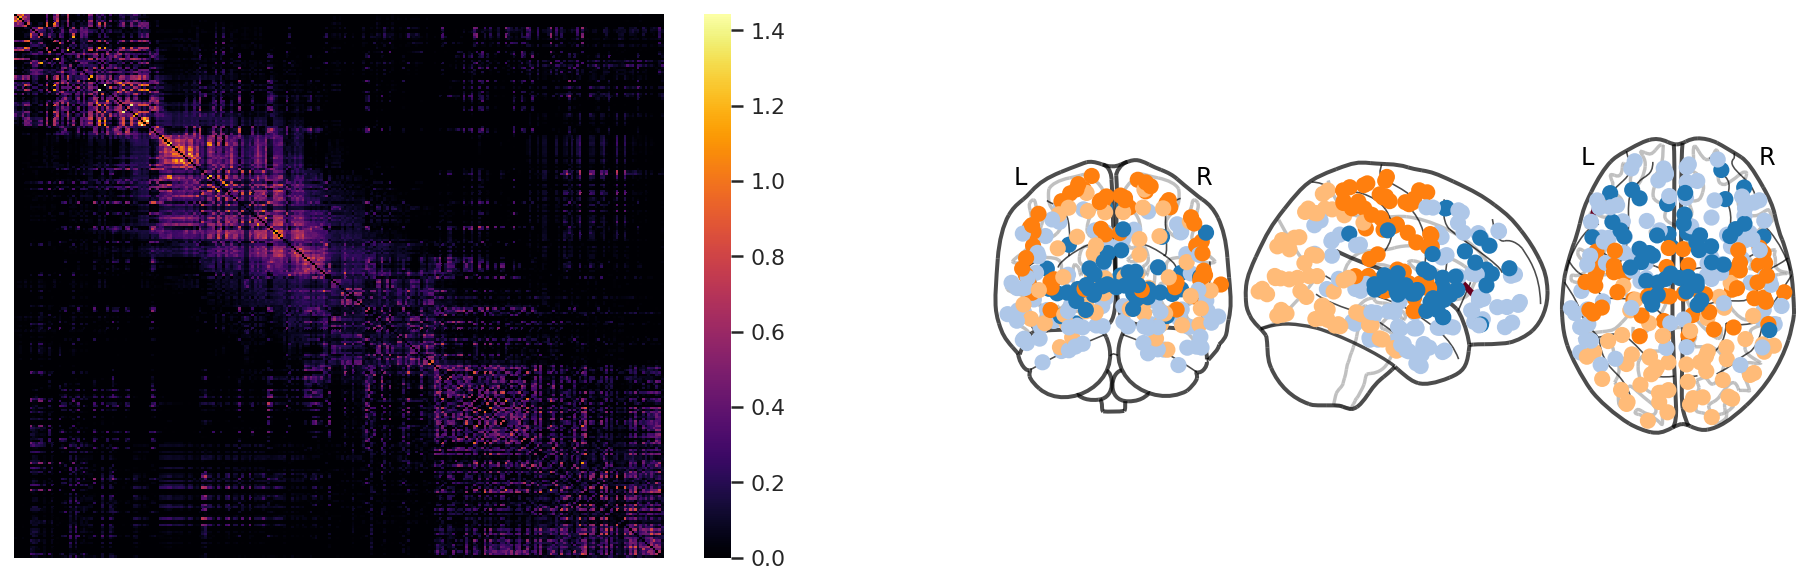

In [26]:
plot_connectograph(reordered_mat_func, colors_func, vmin=0, vmax=None, cmap='inferno')

In [27]:
len(np.unique(node_memberships_func))

4

In [29]:
from matplotlib.colors import ListedColormap

In [30]:
c10 = sns.palettes.color_palette(palette="colorblind", n_colors=10)

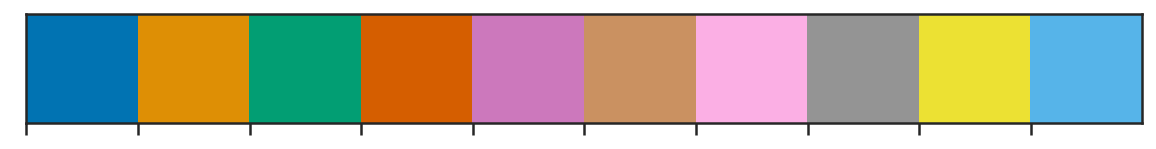

In [31]:
sns.palplot(c10)

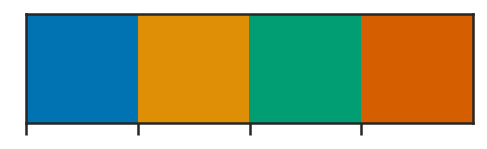

In [34]:
sns.palplot(c10[0:4])

In [35]:
c4 = ListedColormap(c10[0:4], name='c4')

In [37]:
part_img = regions.signals_to_img_maps(node_memberships_func, BNA_4D_path)

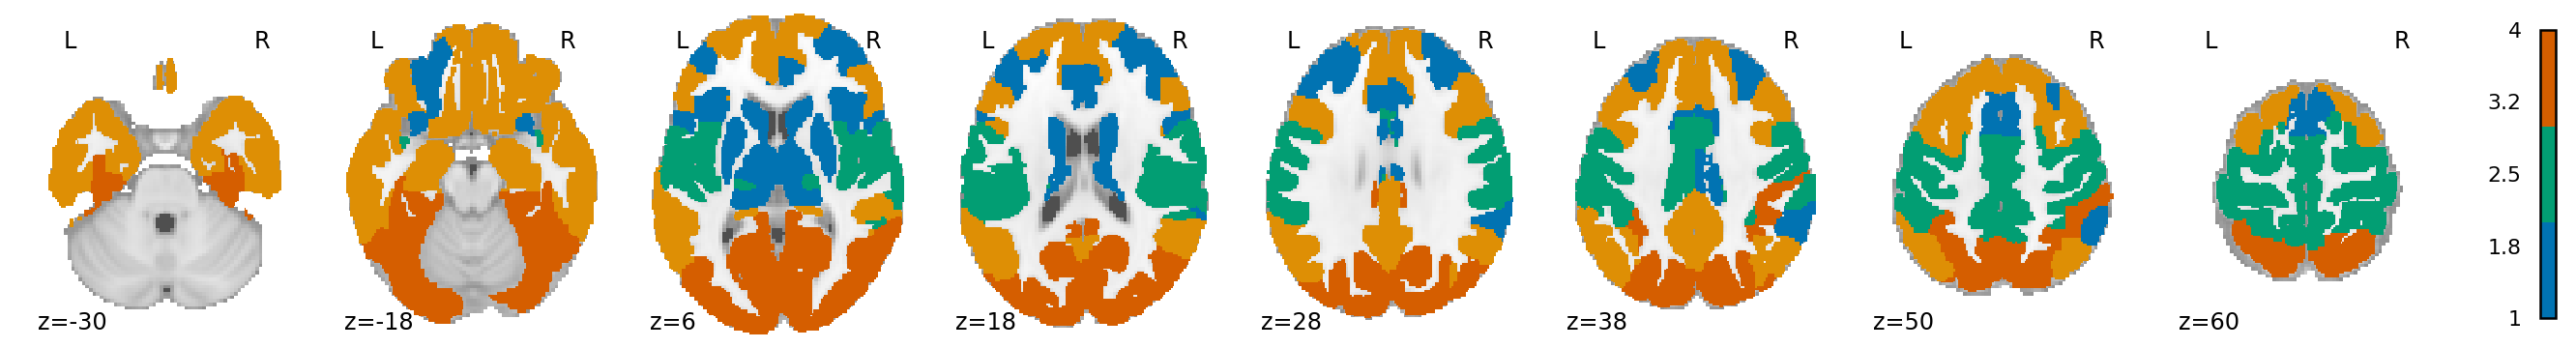

In [39]:
f = plotting.plot_roi(part_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60],cmap=c4, vmin=1, threshold=0.1, alpha=1, colorbar=True)

In [40]:
part_map_lh, part_map_rh = gen_surfaces(node_memberships_func, idx_lh, idx_rh)

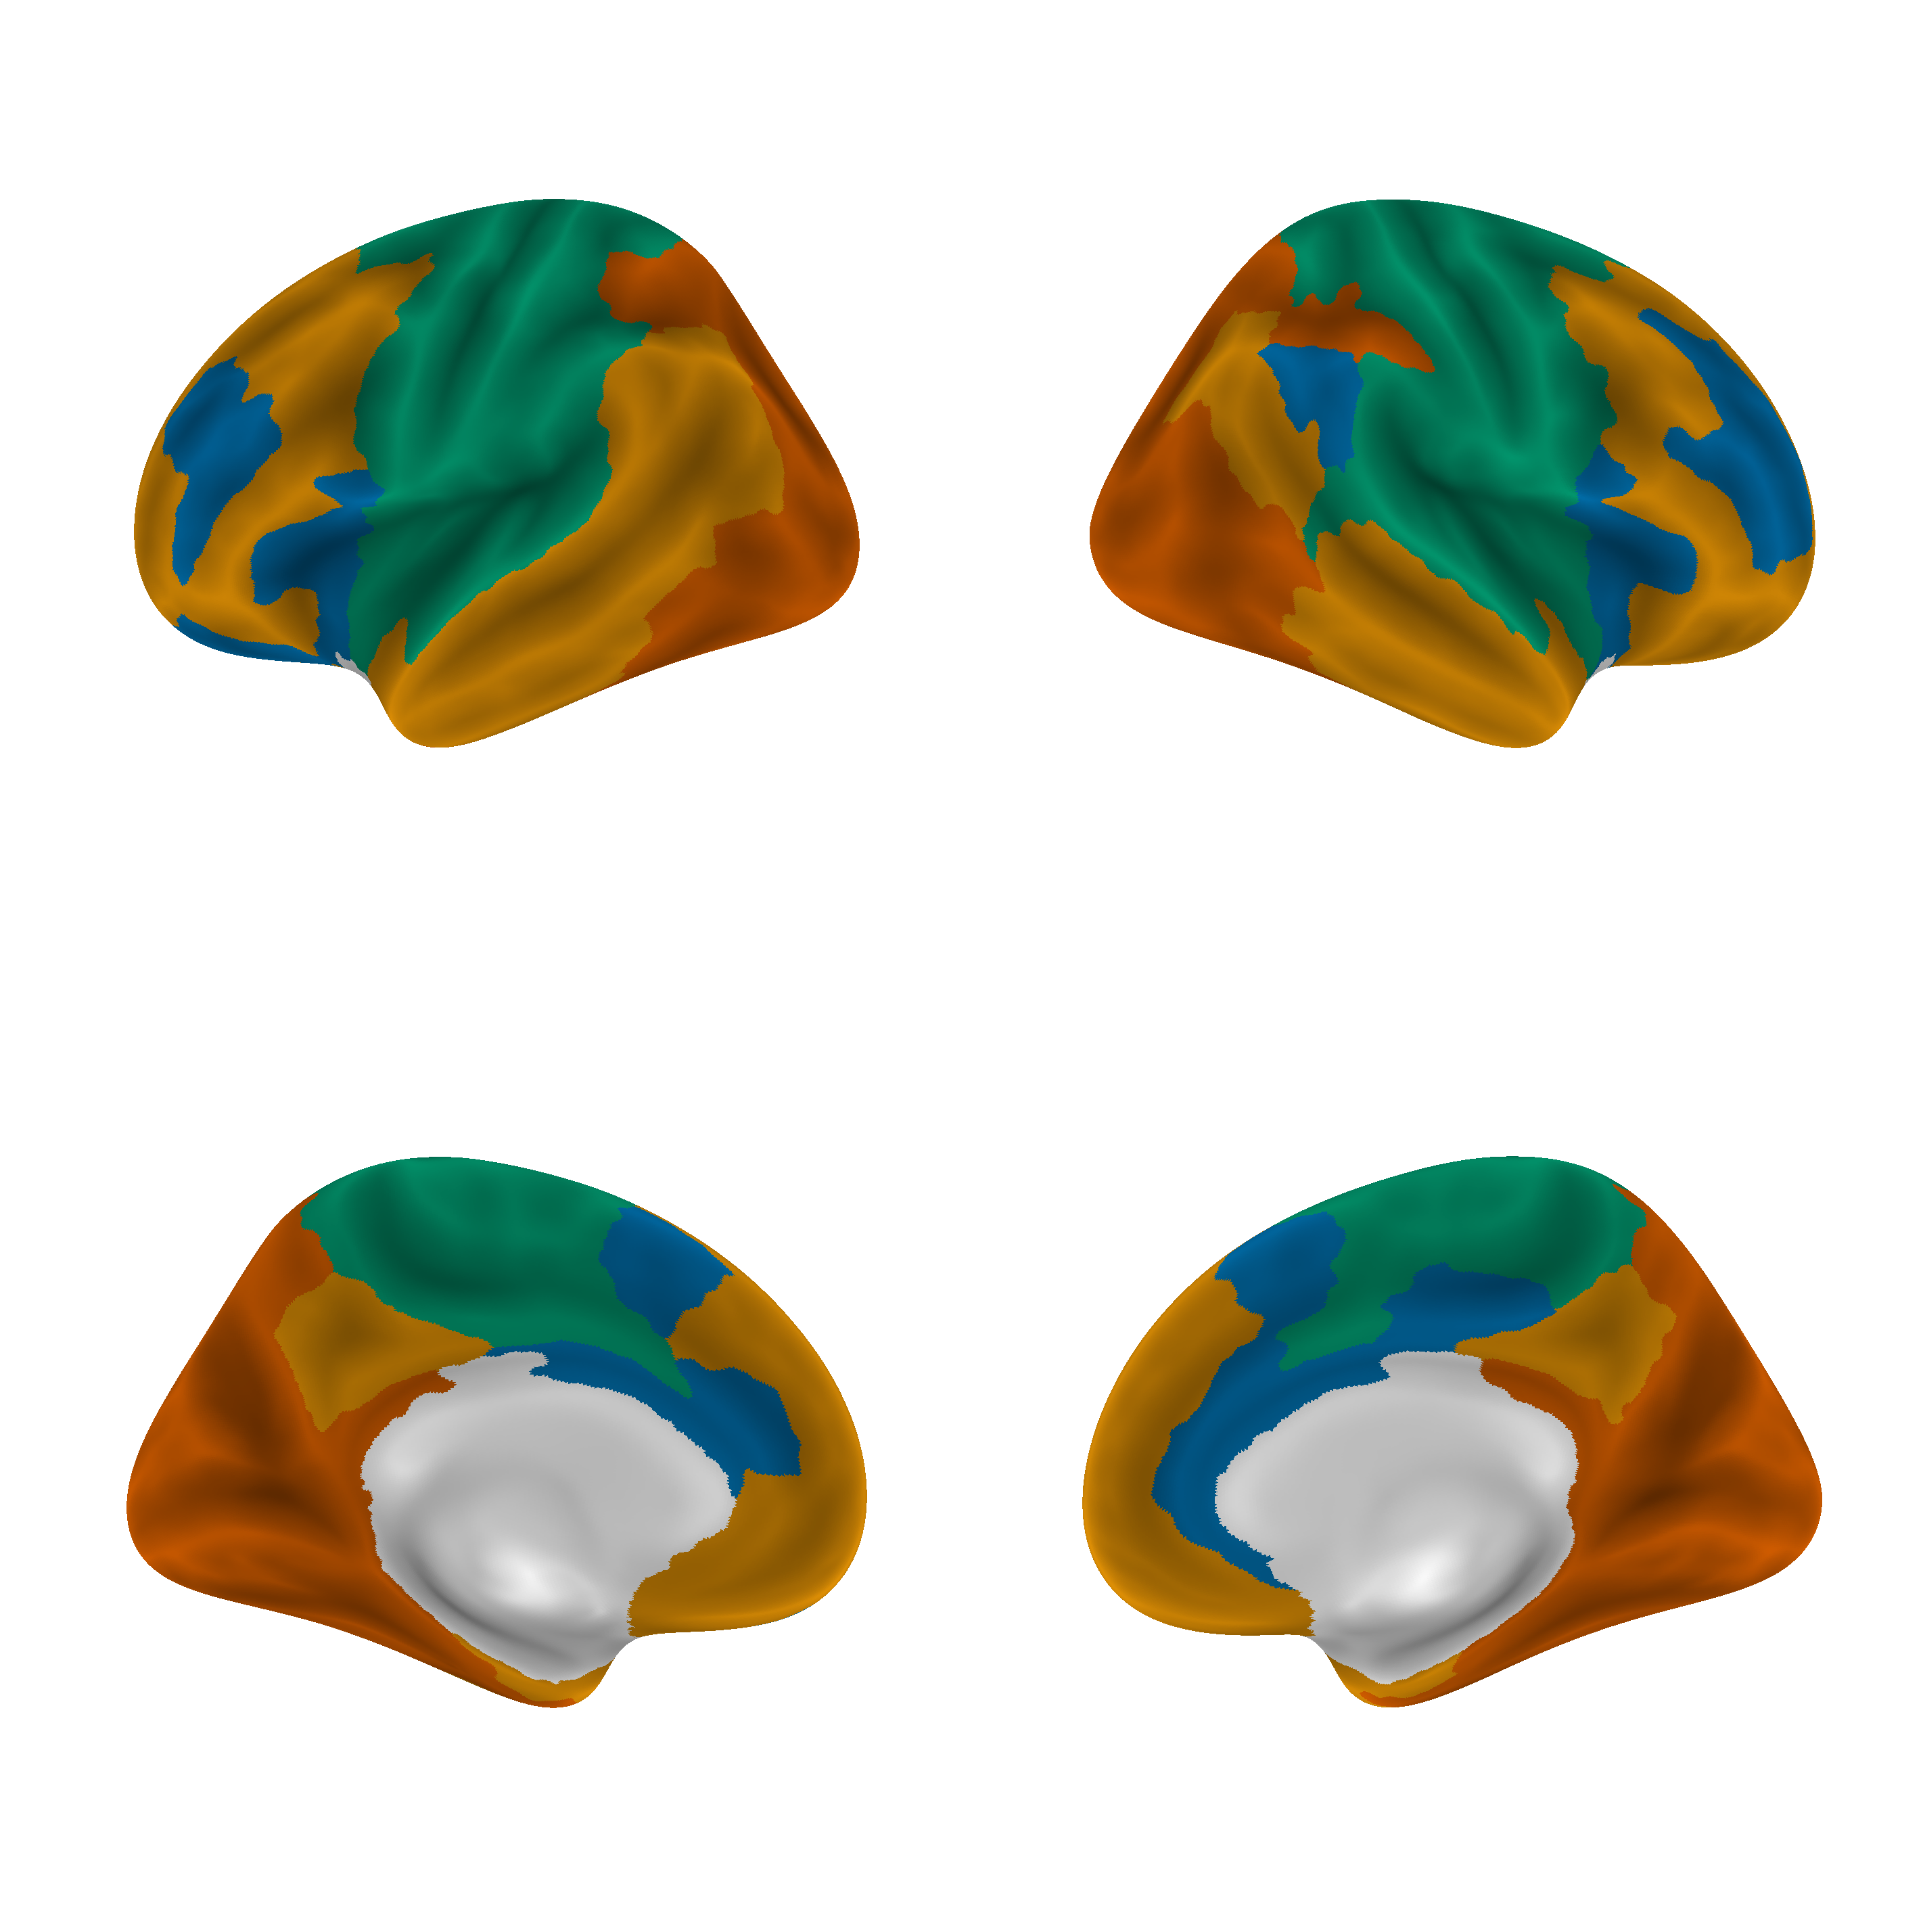

In [42]:
plot_surfaces(lh_infl, part_map_lh, lh_sulc, rh_infl, part_map_rh, rh_sulc, c4, np.min(node_memberships_func), np.max(node_memberships_func))

### Gamma = 2.8

In [43]:
sns.set_style('ticks')

In [44]:
node_memberships_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_2.8_GraphPartition.txt')

In [45]:
colors_func, pallette_func = prepare_communities_NCT(node_memberships_func)

In [46]:
reordered_mat_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_2.8_ReorderedMatrix.txt').reshape(246,246)

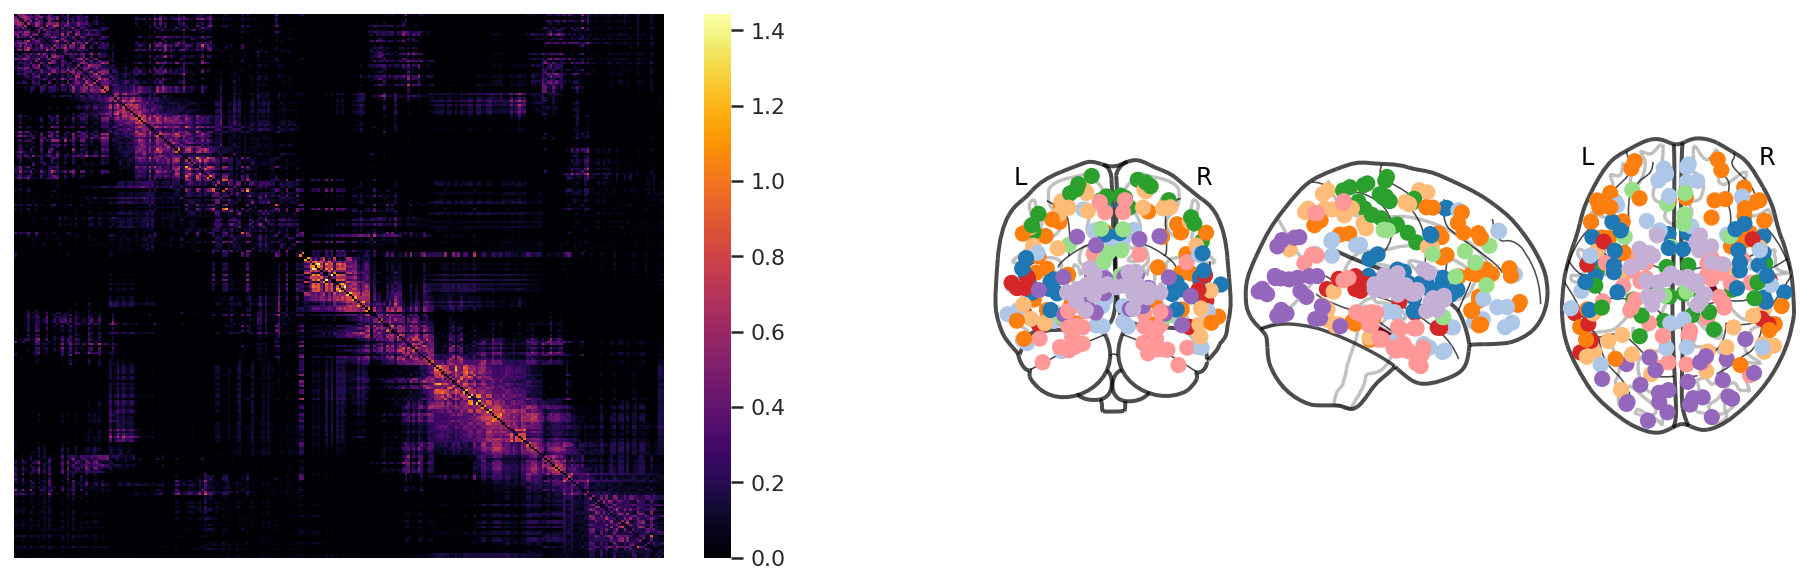

In [47]:
plot_connectograph(reordered_mat_func, colors_func, vmin=0, vmax=None, cmap='inferno')

In [48]:
len(np.unique(node_memberships_func))

10

In [53]:
c20 = sns.palettes.color_palette(palette="tab20", n_colors=20)

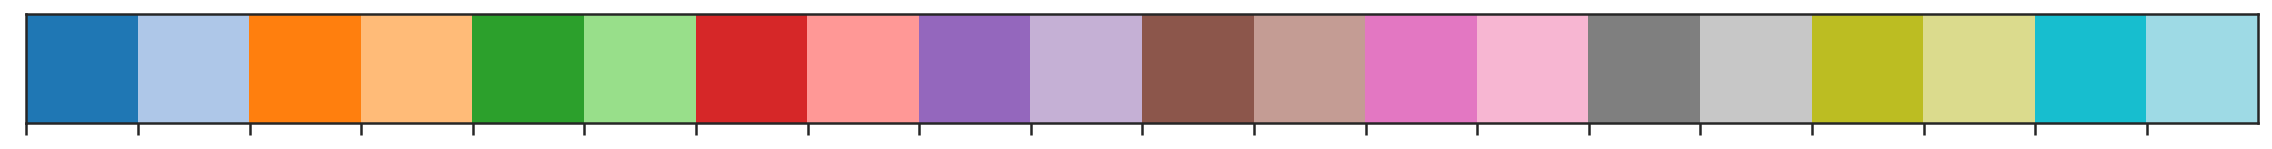

In [54]:
sns.palplot(c20)

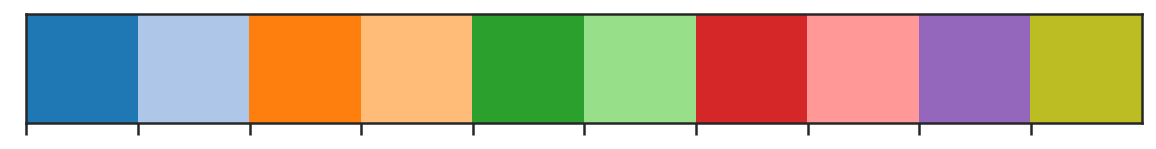

In [61]:
sns.palplot(c20[0:9]+c20[-4:-3])

In [63]:
len(c20[0:9]+c20[-4:-3])

10

In [64]:
c10 = ListedColormap(c20[0:9]+c20[-4:-3], name='c10')

In [65]:
part_img = regions.signals_to_img_maps(node_memberships_func, BNA_4D_path)

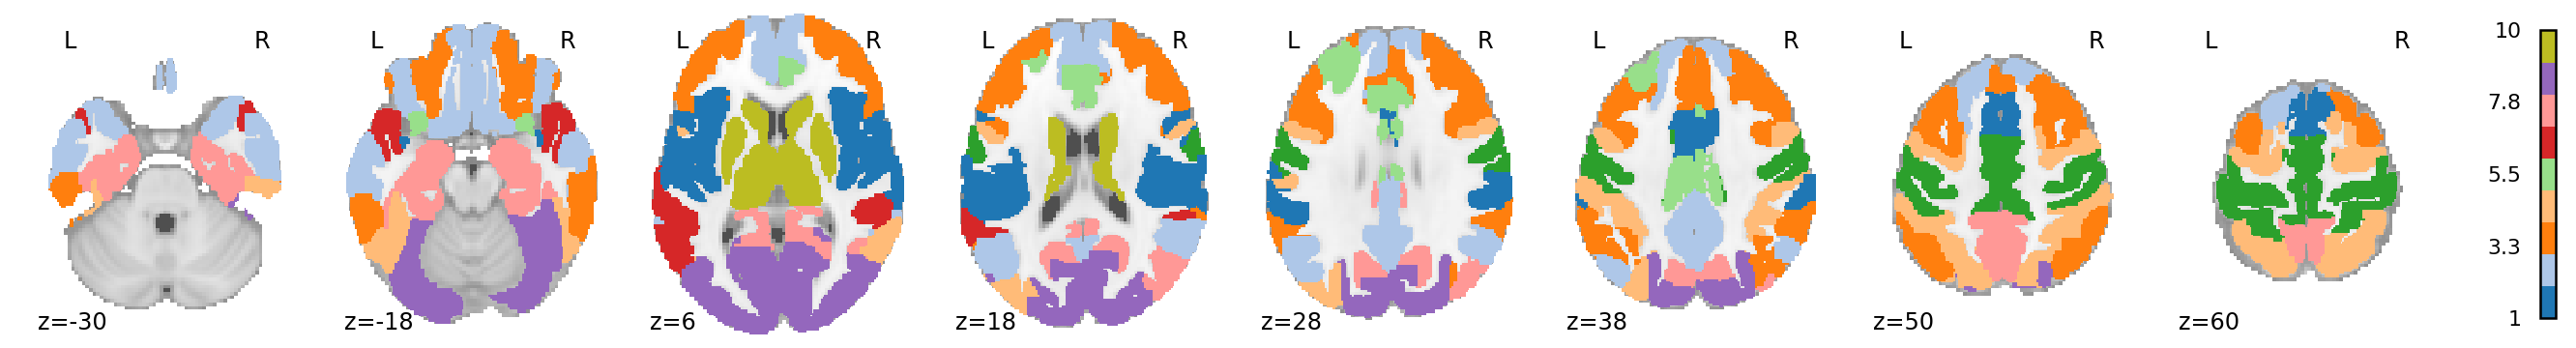

In [66]:
f = plotting.plot_roi(part_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60],cmap=c10, vmin=1, threshold=0.1, alpha=1, colorbar=True)

In [67]:
part_map_lh, part_map_rh = gen_surfaces(node_memberships_func, idx_lh, idx_rh)

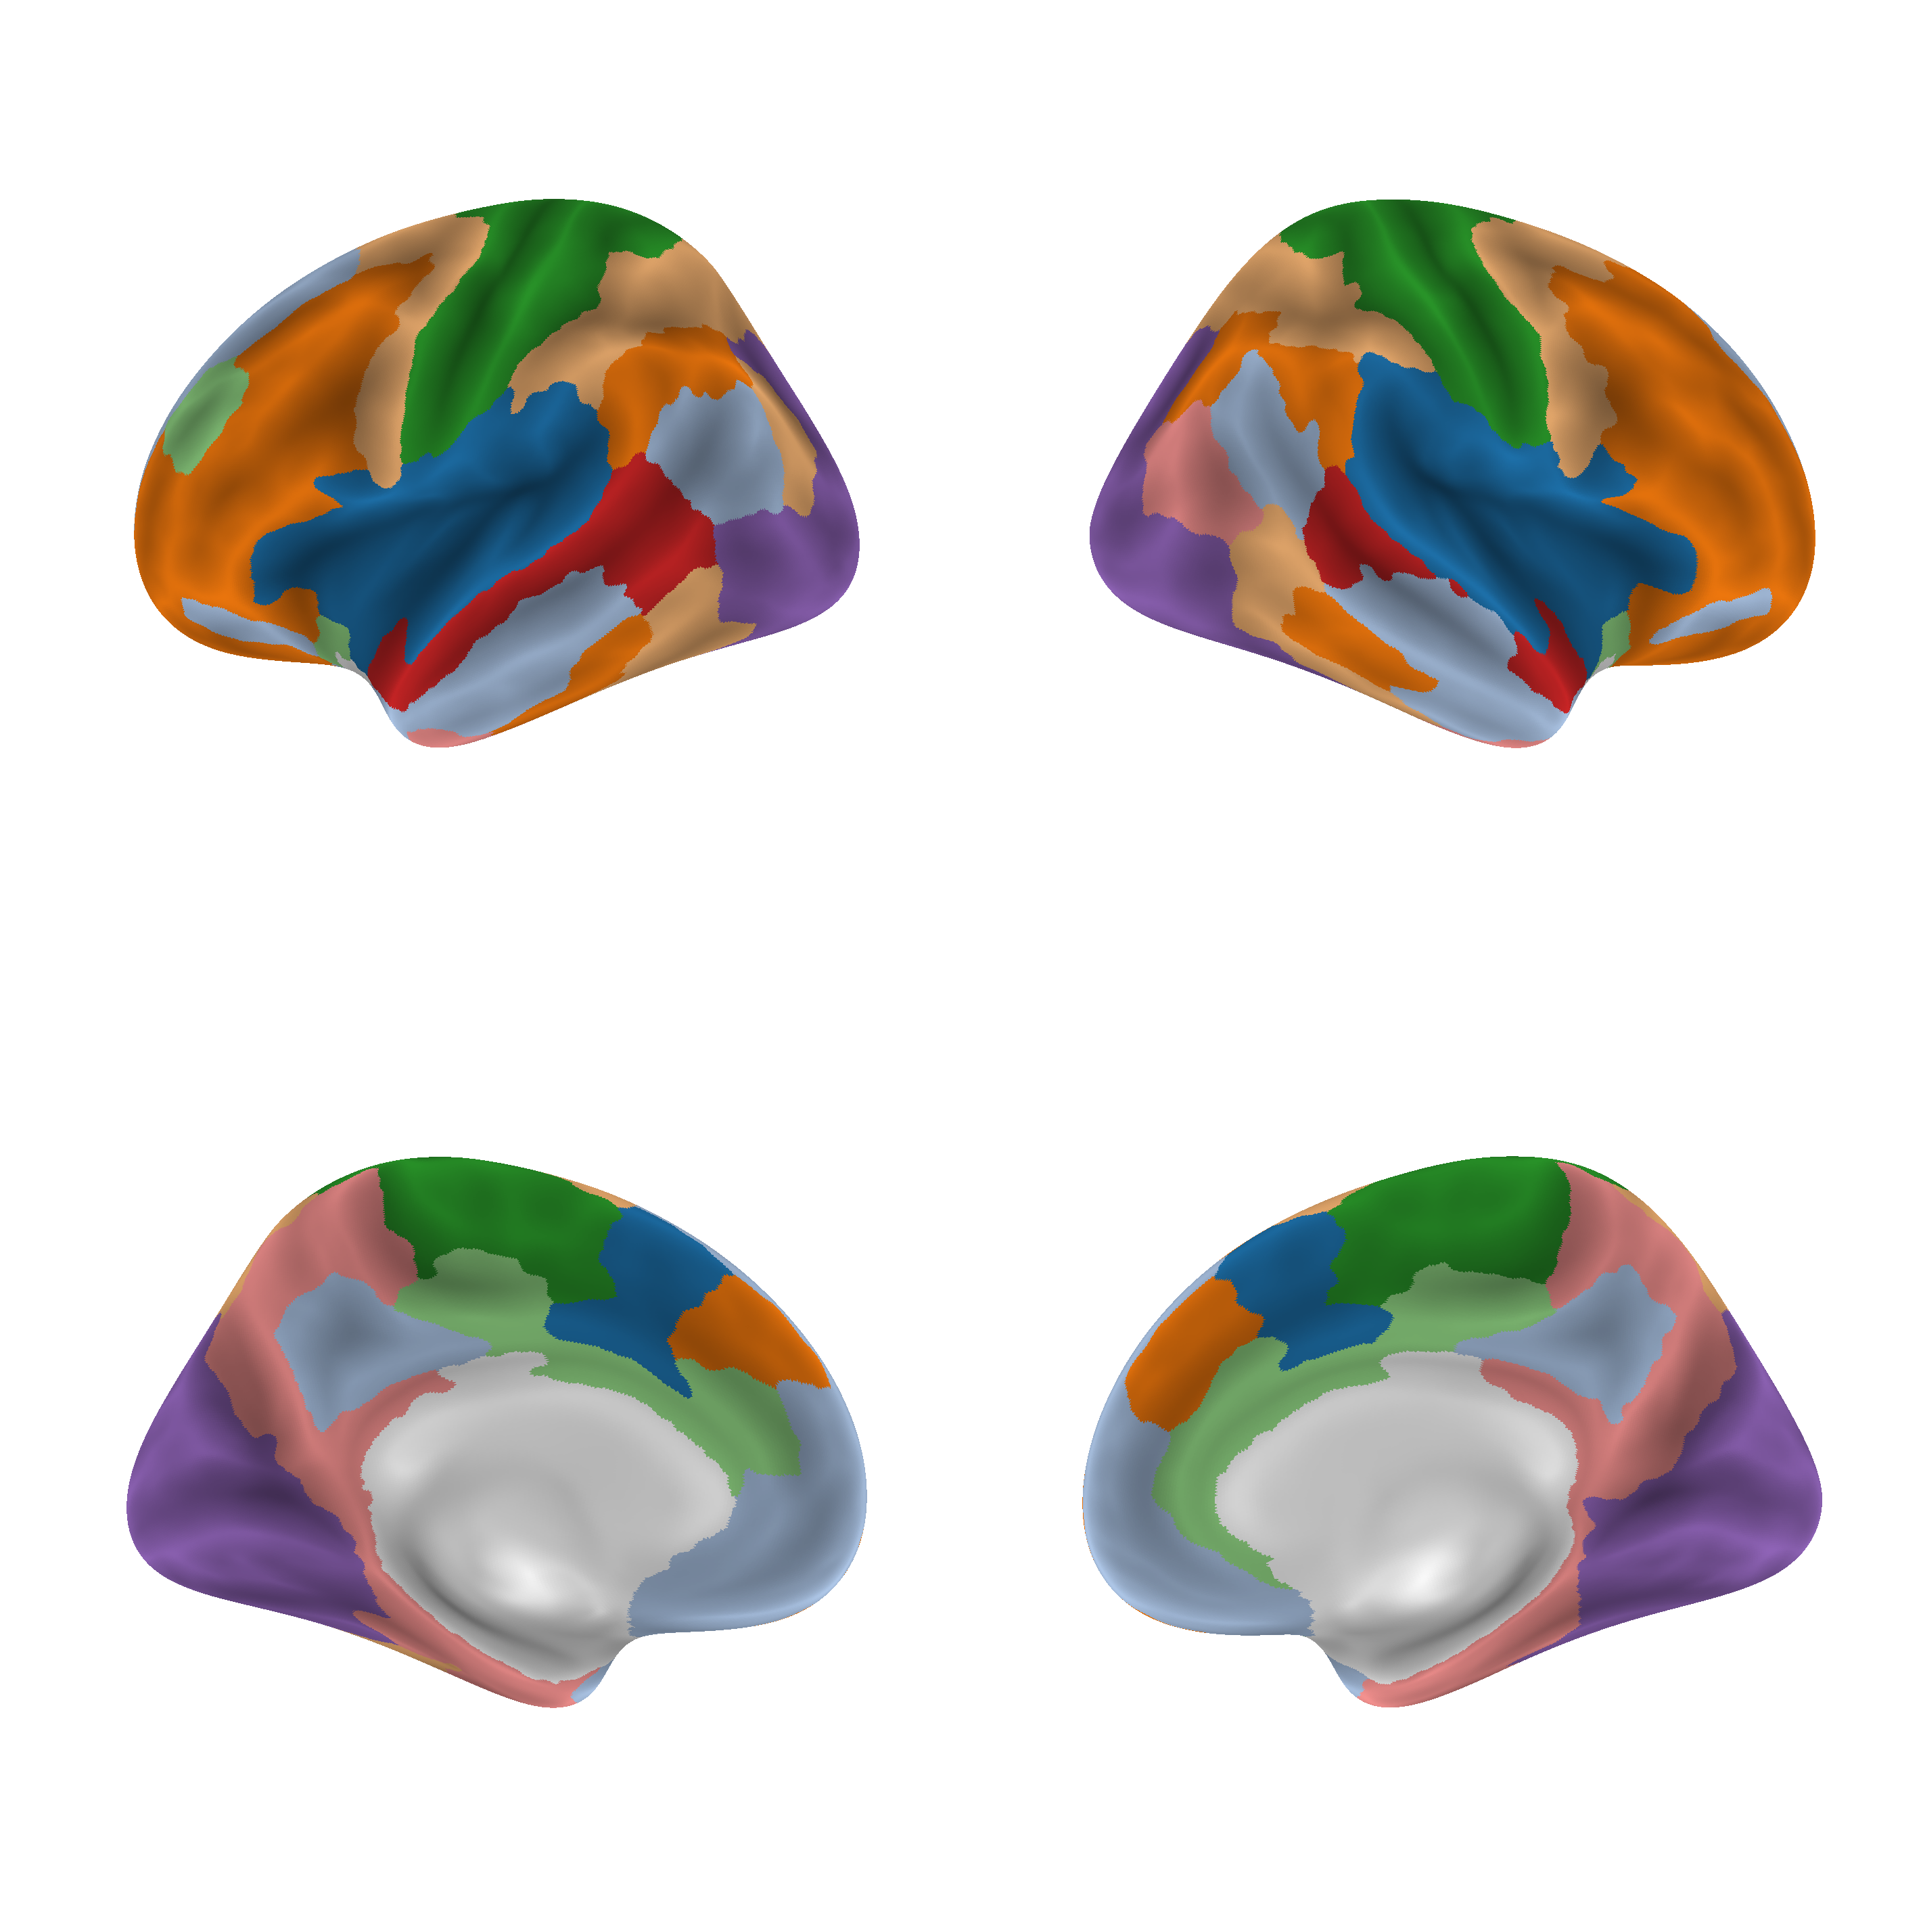

In [68]:
plot_surfaces(lh_infl, part_map_lh, lh_sulc, rh_infl, part_map_rh, rh_sulc, c10, np.min(node_memberships_func), np.max(node_memberships_func))

### Gamma = 3.3

In [96]:
node_memberships_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_3.3_GraphPartition.txt')

In [97]:
colors_func, pallette_func = prepare_communities_NCT(node_memberships_func)

In [98]:
reordered_mat_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_3.3_ReorderedMatrix.txt').reshape(246,246)

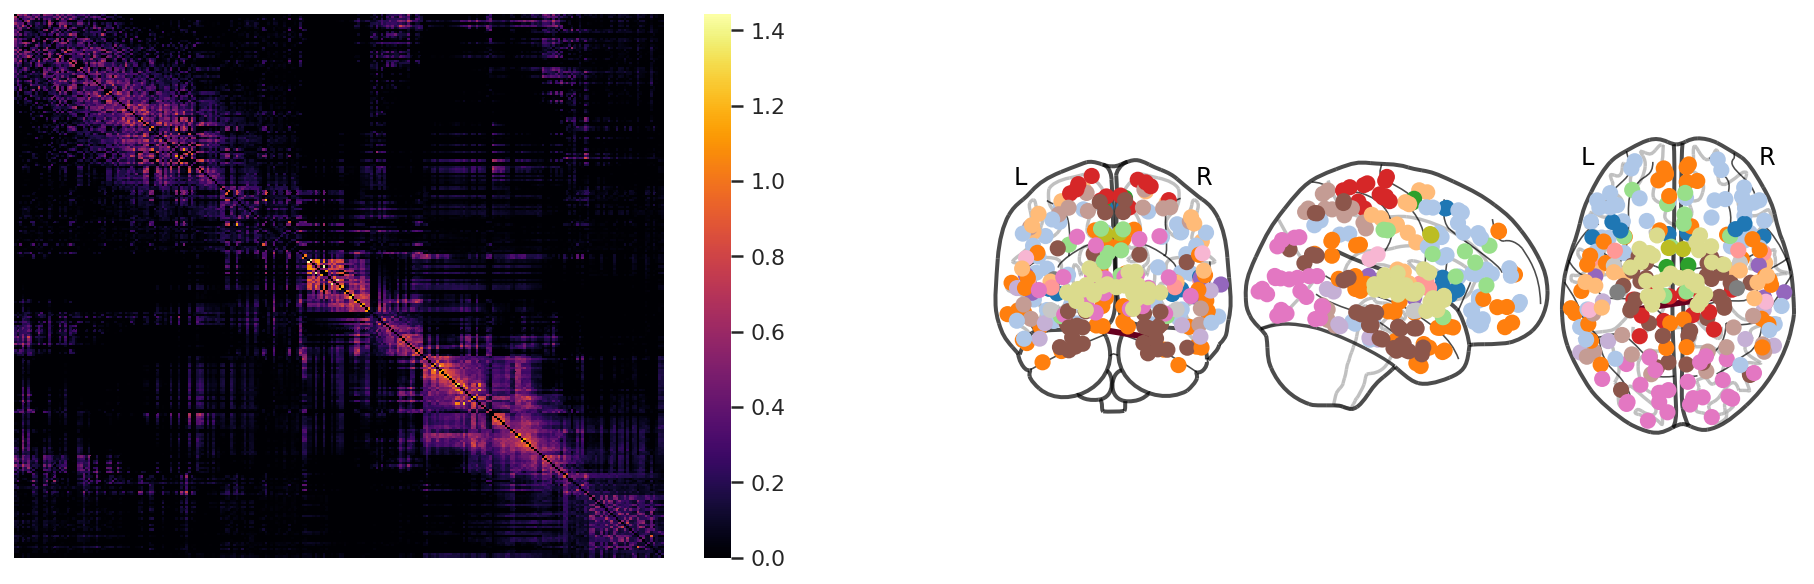

In [99]:
plot_connectograph(reordered_mat_func, colors_func, vmin=0, vmax=None, cmap='inferno')

In [100]:
len(np.unique(node_memberships_func))

18

In [107]:
np.unique(node_memberships_func, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18.]),
 array([ 8, 41, 37, 14,  2, 10, 12,  4,  5,  6, 33, 14, 24,  2,  2,  2,  2,
        28]))

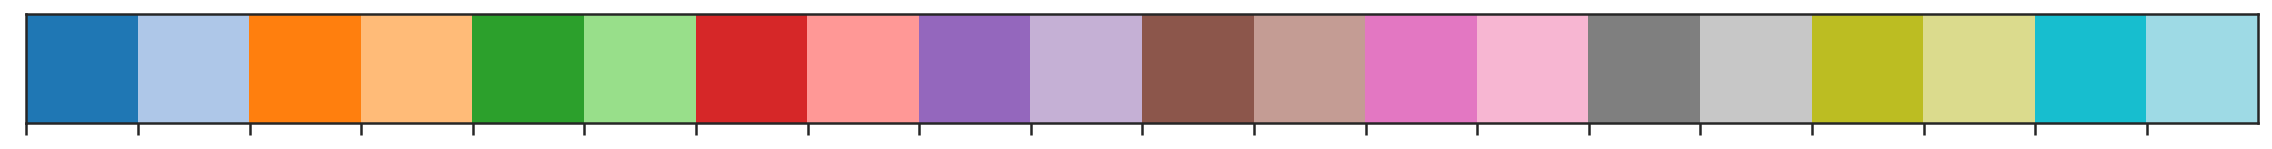

In [74]:
sns.palplot(c20)

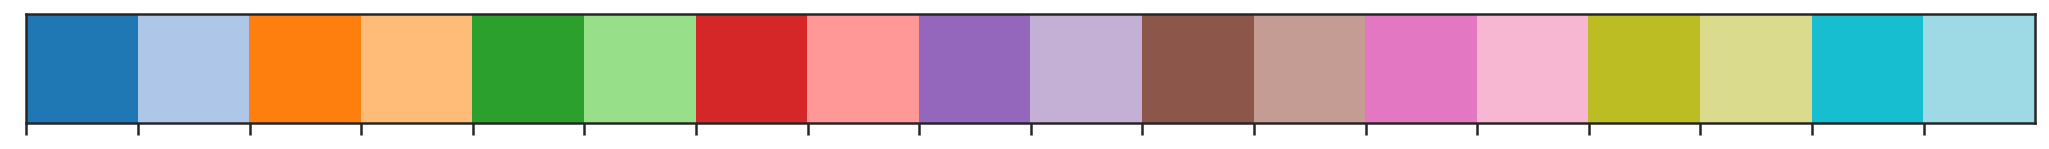

In [82]:
sns.palplot(c20[0:14]+c20[-4:-2]+c20[-2:])

In [83]:
len(c20[0:14]+c20[-4:-2]+c20[-2:])

18

In [84]:
c18 = ListedColormap(c20[0:14]+c20[-4:-2]+c20[-2:], name='c18')

In [101]:
part_img = regions.signals_to_img_maps(node_memberships_func, BNA_4D_path)

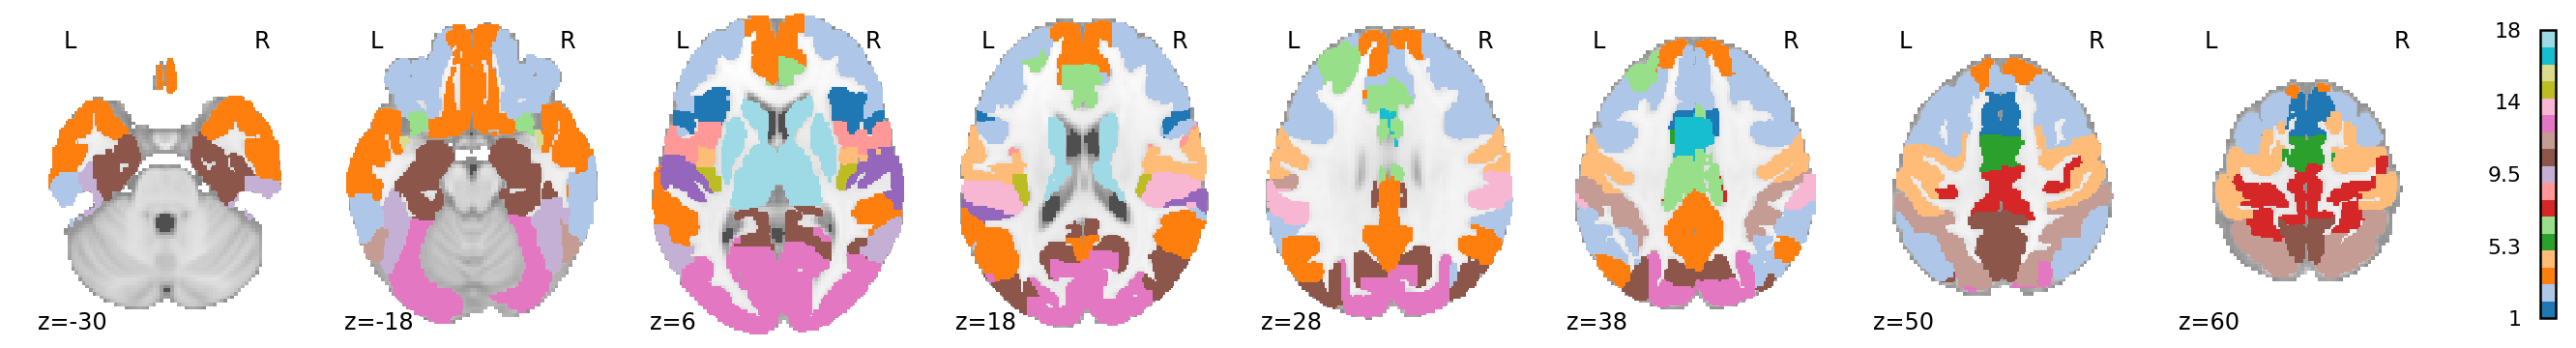

In [102]:
f = plotting.plot_roi(part_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60], cmap=c18, vmin=1, threshold=0.1, alpha=1, colorbar=True)

In [104]:
part_map_lh, part_map_rh = gen_surfaces(node_memberships_func, idx_lh, idx_rh)

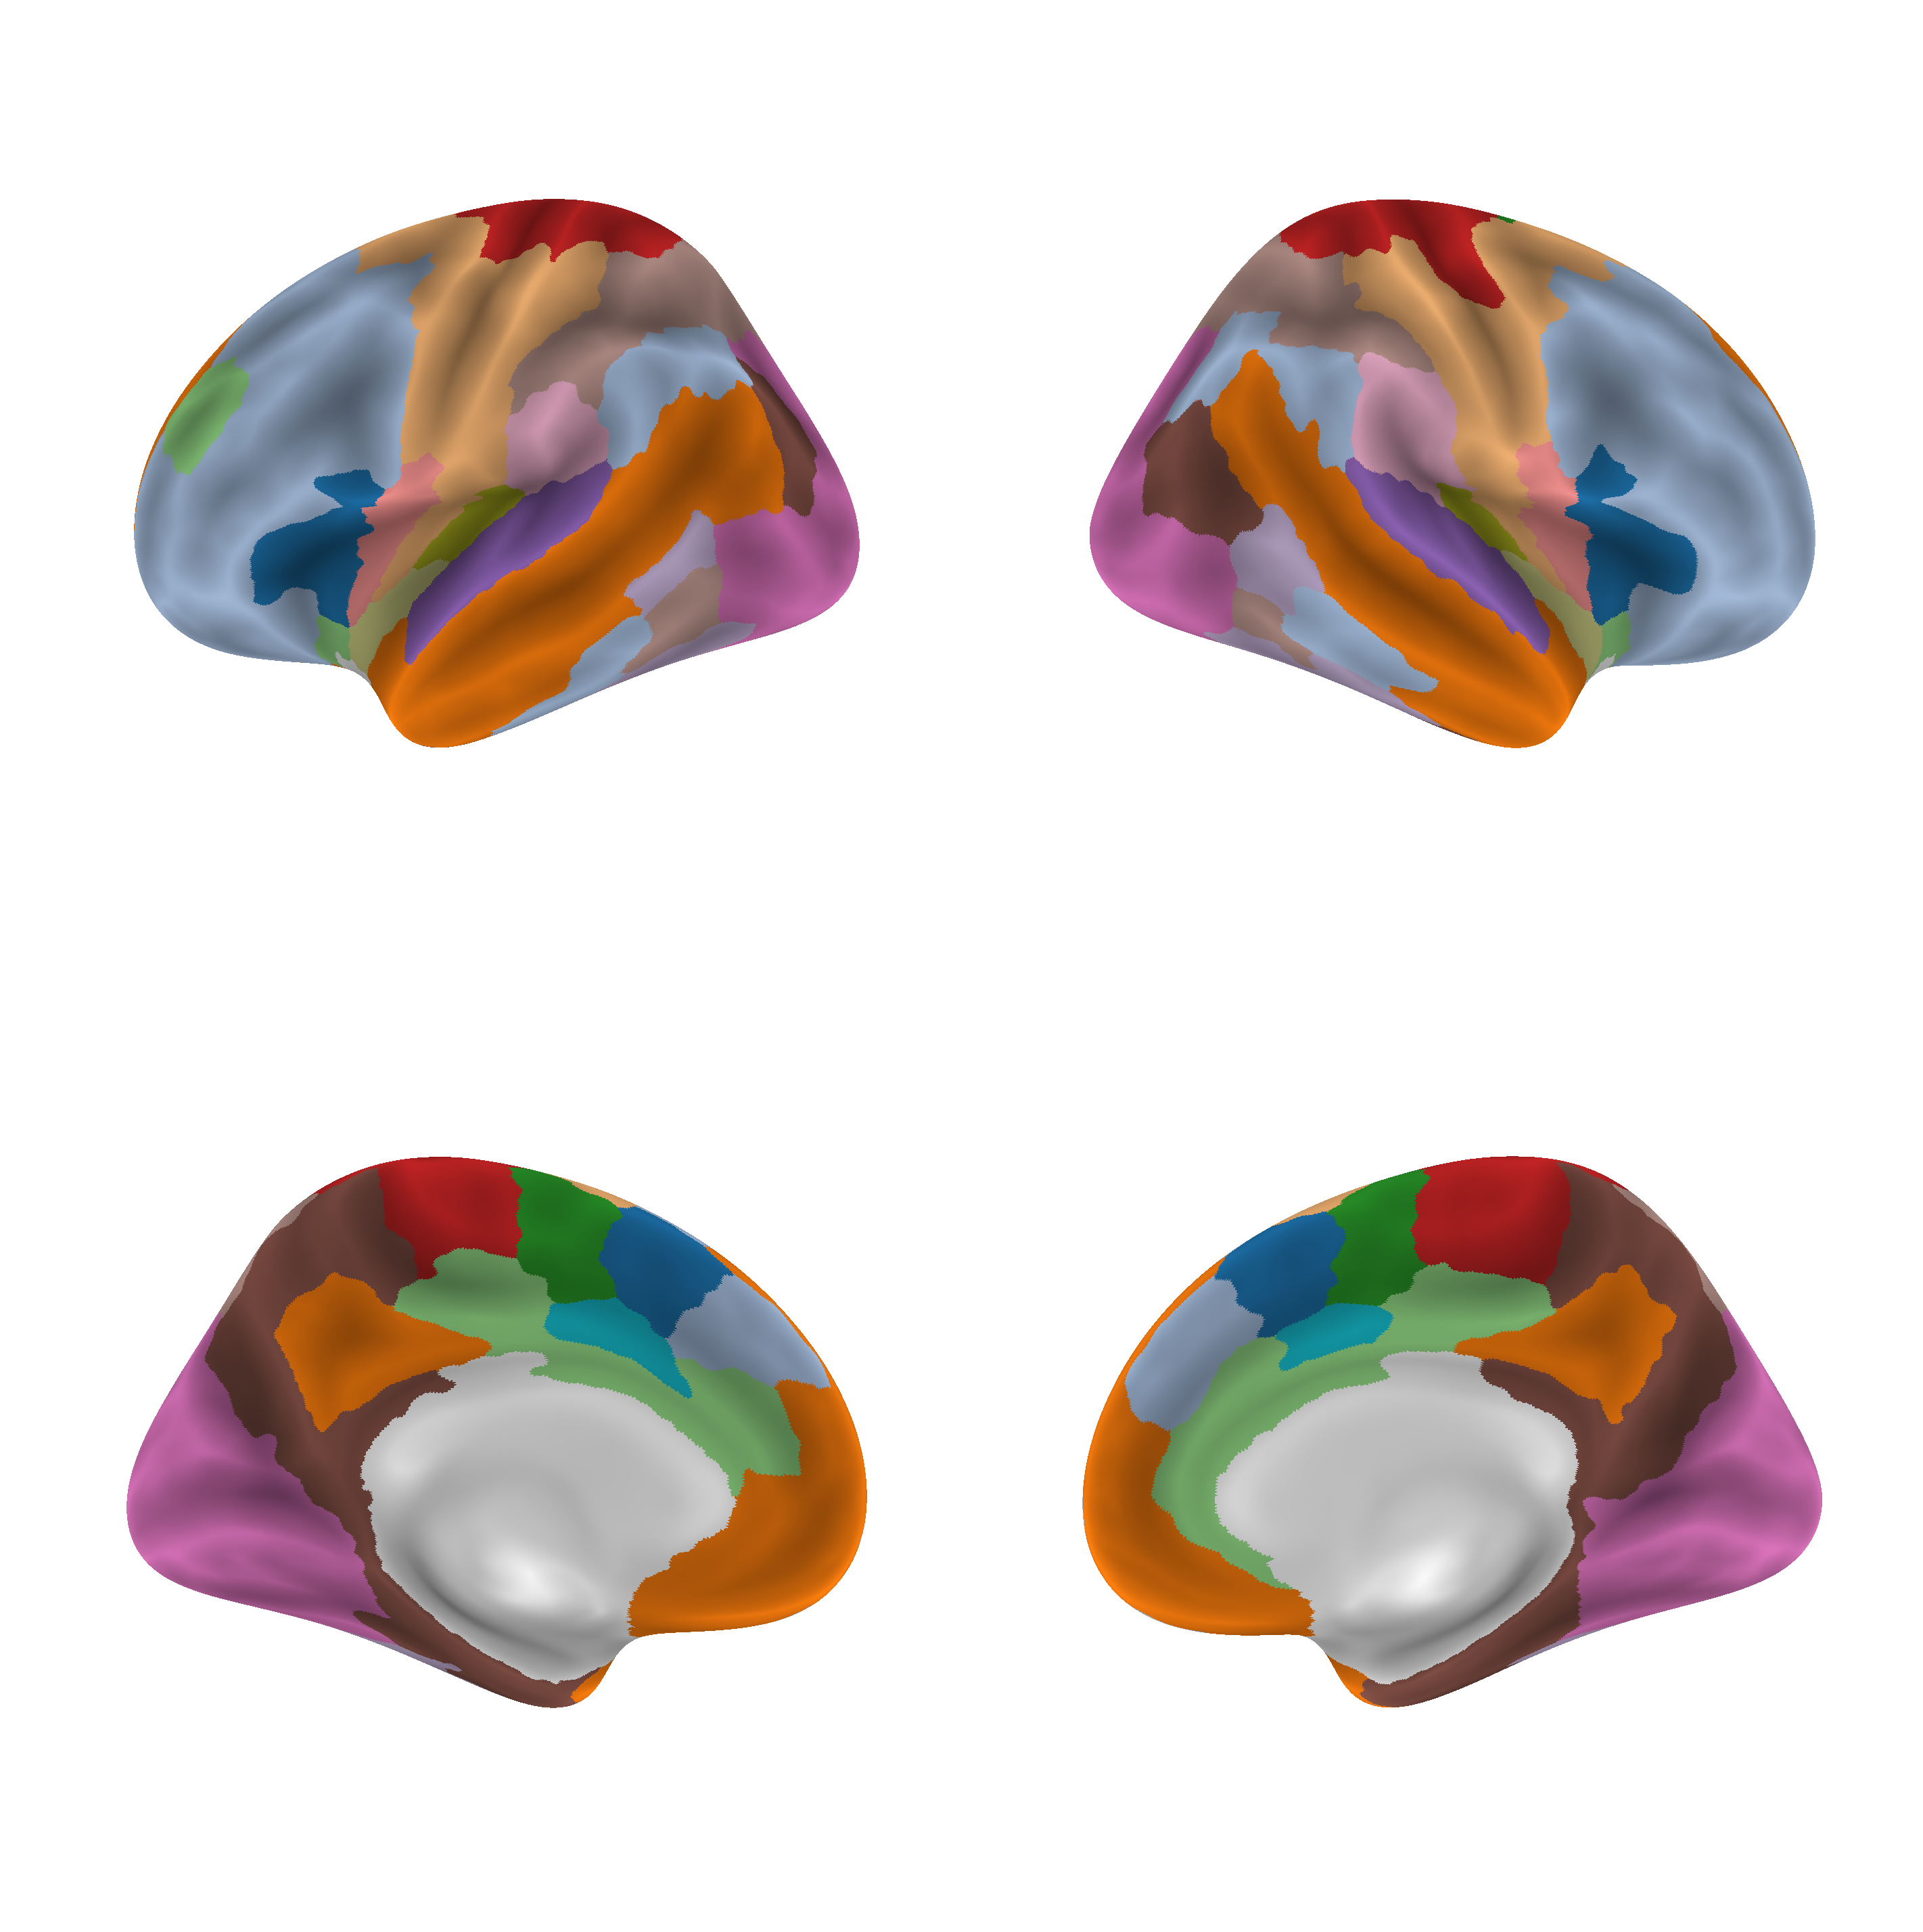

In [106]:
plot_surfaces(lh_infl, part_map_lh, lh_sulc, rh_infl, part_map_rh, rh_sulc, c18, np.min(node_memberships_func), np.max(node_memberships_func))